<h1>Task 1 – Data Loading and data preparation</h1>

In [6]:
#Importing all the required libraries
# conda install -c https://conda.anaconda.org/conda-forge wordcloud
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from IPython.core.interactiveshell import InteractiveShell #For displaying all the output for a sigle cell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Markdown, display  #To use Markup language in a code cell
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sn
import pandas as pd
import numpy as np
import string
import re
import nltk

pd.set_option('display.max_rows', 300)  #To display all the rows in the dataframe 
pd.set_option('max_colwidth', 200)  #To set the maximum width of columns
pd.set_option('display.max_columns', 100)  #To set the maximum number of columns displayed




def printmd(string): #To use Markup language in a code cell
    display(Markdown(string))


#TRAINING DATA
printmd("<h2> Reading and loading x_train and y_train\n")


df1=pd.read_csv('x_train.csv')
#print(df1)
df1.info()
df1.columns=['site','review'] #Giving the column names



df2=pd.read_csv('y_train.csv')
df2.columns=['Sentiment']
#print(df2)
df2.info()


printmd("<h2> x_train and y_train are combined into a single dataframe\n")
df=pd.concat([df1, df2],axis=1) #Combining df1 and df2 into a single dataframe df
df #df has three columns site, review and sentiment

df.info()

#TESTING DATA
printmd("<h2> Reading and loading x_test and y_test\n")

dft1=pd.read_csv('x_test.csv')
dft1.info()
dft1.columns=['site','review'] #Giving the column names


dft2=pd.read_csv('y_test.csv')
dft2.columns=['Sentiment']
dft2.info()


printmd("<h2> x_test and y_test are combined into a single dataframe\n")
dft=pd.concat([dft1, dft2],axis=1) #Combining dft1 and dft2 into a single dataframe dft
dft #dft has three columns site, review and sentiment

printmd("<h2> BEGINNING DATA PRE-PROCESSING\n")



#Performing Data Preprocessing
#Removing Punctuation
printmd("<h2> Removing Punctuation\n")
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review']= df['review'].apply(lambda x:remove_punctuation(x)) #Removing punctuations in train data
dft['review']= dft['review'].apply(lambda x:remove_punctuation(x)) #Removing punctuations in test data
df
dft


#Converting upper case to lower case
df['review']= df['review'].apply(lambda x: x.lower())
dft['review']= dft['review'].apply(lambda x: x.lower())
printmd("<h2> Converting Uppercase to lowercase\n")
df
dft

#Getting rid of numbers
printmd("<h2>Getting rid of numbers\n")
def remove_numbers(text):
    numberfree="".join(c for c in text if not c.isdigit())
    return numberfree

df['review']= df['review'].apply(lambda x:remove_numbers(x))
dft['review']= dft['review'].apply(lambda x:remove_numbers(x))
df
dft




#Tokenization

printmd("<h2>Performing Tokenization\n")
def tokenization(text):
    tokens = re.split(r"\s+",text)
    return tokens
#applying function to the column
df['review']= df['review'].apply(lambda x: tokenization(x))
dft['review']= dft['review'].apply(lambda x: tokenization(x))
df
dft



#Stopword removal

printmd("<h2>Removing stopwords\n")
#stopwords = set(STOPWORDS)
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['review']= df['review'].apply(lambda x:remove_stopwords(x))
dft['review']= dft['review'].apply(lambda x:remove_stopwords(x))
df
dft



#Stemming


printmd("<h2>Performing Stemming\n")
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['review']=df['review'].apply(lambda x: stemming(x))
dft['review']=dft['review'].apply(lambda x: stemming(x))

df
dft





printmd("<h2>Performing Lemmatization\n")
#Lemmatization
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['review']=df['review'].apply(lambda x:lemmatizer(x))
dft['review']=dft['review'].apply(lambda x:lemmatizer(x))





df
dft





printmd("<h2>Sentiment column\n")
df['Sentiment'].value_counts()
dft['Sentiment'].value_counts()

<h2> Reading and loading x_train and y_train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 2 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   amazon                                                                        2399 non-null   object
 1   Oh and I forgot to also mention the weird color effect it has on your phone.  2399 non-null   object
dtypes: object(2)
memory usage: 37.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sentiment  2399 non-null   int64
dtypes: int64(1)
memory usage: 18.9 KB


<h2> x_train and y_train are combined into a single dataframe


,site,review,Sentiment
0,amazon,THAT one didn't work either.,0
1,amazon,Waste of 13 bucks.,0
2,amazon,"Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.",0
3,amazon,None of the three sizes they sent with the headset would stay in my ears.,0
4,amazon,Worst customer service.,0
...,...,...,...
2394,yelp,The sweet potato fries were very good and seasoned well.,1
2395,yelp,I could eat their bruschetta all day it is devine.,1
2396,yelp,Ambience is perfect.,1
2397,yelp,We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   site       2399 non-null   object
 1   review     2399 non-null   object
 2   Sentiment  2399 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 56.4+ KB


<h2> Reading and loading x_test and y_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   amazon                                               599 non-null    object
 1   It only recognizes the Phone as its storage device.  599 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sentiment  599 non-null    int64
dtypes: int64(1)
memory usage: 4.8 KB


<h2> x_test and y_test are combined into a single dataframe


,site,review,Sentiment
0,amazon,Disappointing accessory from a good manufacturer.,0
1,amazon,The one big drawback of the MP3 player is that the buttons on the phone's front cover that let you pause and skip songs lock out after a few seconds.,0
2,amazon,This particular model would not work with my Motorola Q smartphone.,0
3,amazon,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
4,amazon,Also the area where my unit broke).- I'm not too fond of the magnetic strap.,0
...,...,...,...
594,yelp,Everything was fresh and delicious!,1
595,yelp,#NAME?,1
596,yelp,Pretty awesome place.,1
597,yelp,"The staff are great, the ambiance is great.",1


<h2> BEGINNING DATA PRE-PROCESSING


<h2> Removing Punctuation


,site,review,Sentiment
0,amazon,THAT one didnt work either,0
1,amazon,Waste of 13 bucks,0
2,amazon,Product is useless since it does not have enough charging current to charge the 2 cellphones I was planning to use it with,0
3,amazon,None of the three sizes they sent with the headset would stay in my ears,0
4,amazon,Worst customer service,0
...,...,...,...
2394,yelp,The sweet potato fries were very good and seasoned well,1
2395,yelp,I could eat their bruschetta all day it is devine,1
2396,yelp,Ambience is perfect,1
2397,yelp,We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside,1


,site,review,Sentiment
0,amazon,Disappointing accessory from a good manufacturer,0
1,amazon,The one big drawback of the MP3 player is that the buttons on the phones front cover that let you pause and skip songs lock out after a few seconds,0
2,amazon,This particular model would not work with my Motorola Q smartphone,0
3,amazon,If the two were seperated by a mere 5 ft I started to notice excessive static and garbled sound from the headset,0
4,amazon,Also the area where my unit broke Im not too fond of the magnetic strap,0
...,...,...,...
594,yelp,Everything was fresh and delicious,1
595,yelp,NAME,1
596,yelp,Pretty awesome place,1
597,yelp,The staff are great the ambiance is great,1


<h2> Converting Uppercase to lowercase


,site,review,Sentiment
0,amazon,that one didnt work either,0
1,amazon,waste of 13 bucks,0
2,amazon,product is useless since it does not have enough charging current to charge the 2 cellphones i was planning to use it with,0
3,amazon,none of the three sizes they sent with the headset would stay in my ears,0
4,amazon,worst customer service,0
...,...,...,...
2394,yelp,the sweet potato fries were very good and seasoned well,1
2395,yelp,i could eat their bruschetta all day it is devine,1
2396,yelp,ambience is perfect,1
2397,yelp,we ordered the duck rare and it was pink and tender on the inside with a nice char on the outside,1


,site,review,Sentiment
0,amazon,disappointing accessory from a good manufacturer,0
1,amazon,the one big drawback of the mp3 player is that the buttons on the phones front cover that let you pause and skip songs lock out after a few seconds,0
2,amazon,this particular model would not work with my motorola q smartphone,0
3,amazon,if the two were seperated by a mere 5 ft i started to notice excessive static and garbled sound from the headset,0
4,amazon,also the area where my unit broke im not too fond of the magnetic strap,0
...,...,...,...
594,yelp,everything was fresh and delicious,1
595,yelp,name,1
596,yelp,pretty awesome place,1
597,yelp,the staff are great the ambiance is great,1


<h2>Getting rid of numbers


,site,review,Sentiment
0,amazon,that one didnt work either,0
1,amazon,waste of bucks,0
2,amazon,product is useless since it does not have enough charging current to charge the cellphones i was planning to use it with,0
3,amazon,none of the three sizes they sent with the headset would stay in my ears,0
4,amazon,worst customer service,0
...,...,...,...
2394,yelp,the sweet potato fries were very good and seasoned well,1
2395,yelp,i could eat their bruschetta all day it is devine,1
2396,yelp,ambience is perfect,1
2397,yelp,we ordered the duck rare and it was pink and tender on the inside with a nice char on the outside,1


,site,review,Sentiment
0,amazon,disappointing accessory from a good manufacturer,0
1,amazon,the one big drawback of the mp player is that the buttons on the phones front cover that let you pause and skip songs lock out after a few seconds,0
2,amazon,this particular model would not work with my motorola q smartphone,0
3,amazon,if the two were seperated by a mere ft i started to notice excessive static and garbled sound from the headset,0
4,amazon,also the area where my unit broke im not too fond of the magnetic strap,0
...,...,...,...
594,yelp,everything was fresh and delicious,1
595,yelp,name,1
596,yelp,pretty awesome place,1
597,yelp,the staff are great the ambiance is great,1


<h2>Performing Tokenization


,site,review,Sentiment
0,amazon,"[that, one, didnt, work, either]",0
1,amazon,"[waste, of, bucks]",0
2,amazon,"[product, is, useless, since, it, does, not, have, enough, charging, current, to, charge, the, cellphones, i, was, planning, to, use, it, with]",0
3,amazon,"[none, of, the, three, sizes, they, sent, with, the, headset, would, stay, in, my, ears]",0
4,amazon,"[worst, customer, service]",0
...,...,...,...
2394,yelp,"[the, sweet, potato, fries, were, very, good, and, seasoned, well]",1
2395,yelp,"[i, could, eat, their, bruschetta, all, day, it, is, devine]",1
2396,yelp,"[ambience, is, perfect]",1
2397,yelp,"[we, ordered, the, duck, rare, and, it, was, pink, and, tender, on, the, inside, with, a, nice, char, on, the, outside]",1


,site,review,Sentiment
0,amazon,"[disappointing, accessory, from, a, good, manufacturer]",0
1,amazon,"[the, one, big, drawback, of, the, mp, player, is, that, the, buttons, on, the, phones, front, cover, that, let, you, pause, and, skip, songs, lock, out, after, a, few, seconds]",0
2,amazon,"[this, particular, model, would, not, work, with, my, motorola, q, smartphone]",0
3,amazon,"[if, the, two, were, seperated, by, a, mere, ft, i, started, to, notice, excessive, static, and, garbled, sound, from, the, headset]",0
4,amazon,"[also, the, area, where, my, unit, broke, im, not, too, fond, of, the, magnetic, strap]",0
...,...,...,...
594,yelp,"[everything, was, fresh, and, delicious]",1
595,yelp,[name],1
596,yelp,"[pretty, awesome, place]",1
597,yelp,"[the, staff, are, great, the, ambiance, is, great]",1


<h2>Removing stopwords


,site,review,Sentiment
0,amazon,"[one, didnt, work, either]",0
1,amazon,"[waste, bucks]",0
2,amazon,"[product, useless, since, enough, charging, current, charge, cellphones, planning, use]",0
3,amazon,"[none, three, sizes, sent, headset, would, stay, ears]",0
4,amazon,"[worst, customer, service]",0
...,...,...,...
2394,yelp,"[sweet, potato, fries, good, seasoned, well]",1
2395,yelp,"[could, eat, bruschetta, day, devine]",1
2396,yelp,"[ambience, perfect]",1
2397,yelp,"[ordered, duck, rare, pink, tender, inside, nice, char, outside]",1


,site,review,Sentiment
0,amazon,"[disappointing, accessory, good, manufacturer]",0
1,amazon,"[one, big, drawback, mp, player, buttons, phones, front, cover, let, pause, skip, songs, lock, seconds]",0
2,amazon,"[particular, model, would, work, motorola, q, smartphone]",0
3,amazon,"[two, seperated, mere, ft, started, notice, excessive, static, garbled, sound, headset]",0
4,amazon,"[also, area, unit, broke, im, fond, magnetic, strap]",0
...,...,...,...
594,yelp,"[everything, fresh, delicious]",1
595,yelp,[name],1
596,yelp,"[pretty, awesome, place]",1
597,yelp,"[staff, great, ambiance, great]",1


<h2>Performing Stemming


,site,review,Sentiment
0,amazon,"[one, didnt, work, either]",0
1,amazon,"[wast, buck]",0
2,amazon,"[product, useless, sinc, enough, charg, current, charg, cellphon, plan, use]",0
3,amazon,"[none, three, size, sent, headset, would, stay, ear]",0
4,amazon,"[worst, custom, servic]",0
...,...,...,...
2394,yelp,"[sweet, potato, fri, good, season, well]",1
2395,yelp,"[could, eat, bruschetta, day, devin]",1
2396,yelp,"[ambienc, perfect]",1
2397,yelp,"[order, duck, rare, pink, tender, insid, nice, char, outsid]",1


,site,review,Sentiment
0,amazon,"[disappoint, accessori, good, manufactur]",0
1,amazon,"[one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]",0
2,amazon,"[particular, model, would, work, motorola, q, smartphon]",0
3,amazon,"[two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]",0
4,amazon,"[also, area, unit, broke, im, fond, magnet, strap]",0
...,...,...,...
594,yelp,"[everyth, fresh, delici]",1
595,yelp,[name],1
596,yelp,"[pretti, awesom, place]",1
597,yelp,"[staff, great, ambianc, great]",1


<h2>Performing Lemmatization


,site,review,Sentiment
0,amazon,"[one, didnt, work, either]",0
1,amazon,"[wast, buck]",0
2,amazon,"[product, useless, sinc, enough, charg, current, charg, cellphon, plan, use]",0
3,amazon,"[none, three, size, sent, headset, would, stay, ear]",0
4,amazon,"[worst, custom, servic]",0
...,...,...,...
2394,yelp,"[sweet, potato, fri, good, season, well]",1
2395,yelp,"[could, eat, bruschetta, day, devin]",1
2396,yelp,"[ambienc, perfect]",1
2397,yelp,"[order, duck, rare, pink, tender, insid, nice, char, outsid]",1


,site,review,Sentiment
0,amazon,"[disappoint, accessori, good, manufactur]",0
1,amazon,"[one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]",0
2,amazon,"[particular, model, would, work, motorola, q, smartphon]",0
3,amazon,"[two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]",0
4,amazon,"[also, area, unit, broke, im, fond, magnet, strap]",0
...,...,...,...
594,yelp,"[everyth, fresh, delici]",1
595,yelp,[name],1
596,yelp,"[pretti, awesom, place]",1
597,yelp,"[staff, great, ambianc, great]",1


<h2>Sentiment column


1    1200
0    1199
Name: Sentiment, dtype: int64

1    300
0    299
Name: Sentiment, dtype: int64

<h1>Task 2 – Feature representation </h1>

<h2>A wordcloud for the reviews in the training set


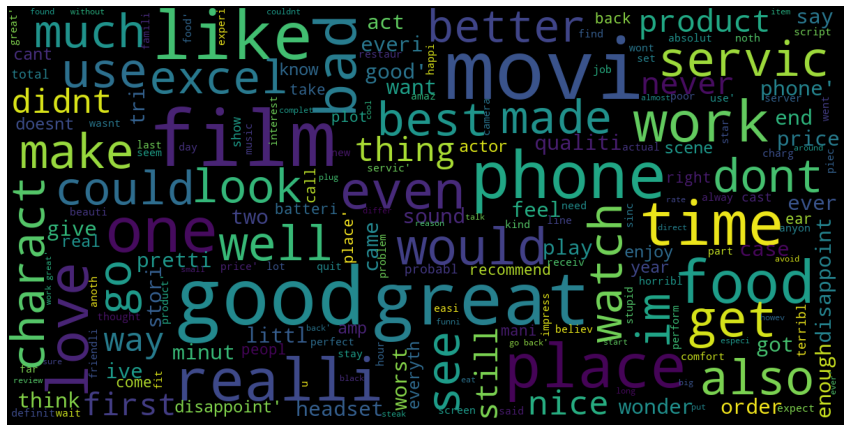

<h2>Implementing CountVectoriser


Creating the bag of words...

(2399, 6000)


,abandon,abil,abl,absolut,absolut amaz,absolut love,accept,access,accident,accur,accus,accus murder,act,act bad,action,action movi,action scene,actor,actor play,actor screen,actress,actual,actual turn,ad,adapt,addit,ador,advertis,advis,aerial,aerial scene,africa,afternoon,age,ago,air,allow,almost,almost unrecogniz,along,alreadi,also,also bad,also great,also make,also phone,also tast,although,alway,alway good,...,yet delici,yet enjoy,yet hear,yet run,yet sequel,yet seriou,youd,youd expect,youd iq,youd like,youd ventur,youdo,youdo rent,youll,youll appreci,youll impress,youll love,youll shed,young,young judg,young man,young movi,younger,younger set,your,your familiar,your gonna,your serv,your visual,youth,youth energi,youtub,yucki,yukon,yukon gold,yum,yum sauc,yum yum,yummi,yummi tri,yummi tummi,yun,yun fat,za,za im,zero,zero star,zero tast,zillion,zillion time
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Done


<h2>Feature Names


['abandon', 'abil', 'abl', 'absolut', 'absolut amaz', 'absolut love', 'accept', 'access', 'accident', 'accur', 'accus', 'accus murder', 'act', 'act bad', 'action', 'action movi', 'action scene', 'actor', 'actor play', 'actor screen', 'actress', 'actual', 'actual turn', 'ad', 'adapt', 'addit', 'ador', 'advertis', 'advis', 'aerial', 'aerial scene', 'africa', 'afternoon', 'age', 'ago', 'air', 'allow', 'almost', 'almost unrecogniz', 'along', 'alreadi', 'also', 'also bad', 'also great', 'also make', 'also phone', 'also tast', 'although', 'alway', 'alway good', 'amaz', 'amaz film', 'amazon', 'ambianc', 'ambienc', 'america', 'american', 'among', 'amount', 'amp', 'ampl', 'angel', 'angl', 'anim', 'ann', 'annoy', 'anoth', 'anoth minut', 'anoth said', 'anyon', 'anyon could', 'anyon interest', 'anyth', 'anytim', 'anytim soon', 'anyway', 'apart', 'apolog', 'appal', 'appar', 'appeal', 'appear', 'appet', 'appreci', 'appreci subtl', 'area', 'arent', 'around', 'around pm', 'arriv', 'arriv quickli', 'ar

<h2>Word Count occurrences


{'one': 2105,
 'didnt': 482,
 'work': 5678,
 'either': 587,
 'one didnt': 2126,
 'didnt work': 486,
 'work either': 5691,
 'wast': 5450,
 'buck': 235,
 'wast buck': 5451,
 'product': 3310,
 'useless': 5259,
 'sinc': 4179,
 'enough': 605,
 'charg': 299,
 'current': 427,
 'cellphon': 287,
 'plan': 2894,
 'use': 5210,
 'product useless': 3336,
 'useless sinc': 5263,
 'enough charg': 606,
 'charg current': 300,
 'plan use': 2899,
 'none': 1926,
 'three': 4521,
 'size': 4186,
 'headset': 928,
 'would': 5803,
 'stay': 4262,
 'ear': 561,
 'none three': 1929,
 'three size': 4526,
 'would stay': 5845,
 'stay ear': 4264,
 'worst': 5755,
 'custom': 429,
 'servic': 4139,
 'worst custom': 5757,
 'custom servic': 430,
 'ngage': 1846,
 'still': 4270,
 'lack': 1091,
 'earbud': 567,
 'ngage still': 1847,
 'alway': 48,
 'cut': 431,
 'make': 1197,
 'beep': 167,
 'sound': 4220,
 'say': 4083,
 'signal': 4173,
 'fail': 674,
 'beep beep': 168,
 'disappoint': 497,
 'thing': 4405,
 'thing speakerphon': 4429,
 

<h2>Implementing tf-idf


<h2>After tf-idf


,abandon,abandon factori,abhor,abil,abil actual,abil dwight,abil meld,abil pull,abl,abl roam,abl use,abl voic,abound,abovepretti,abovepretti useless,abroad,abroad interact,absolut,absolut abysm,absolut amaz,absolut appal,absolut back,absolut delici,absolut flatlin,absolut flavor,absolut great,absolut hilari,absolut love,absolut must,absolut noth,absolut problem,absolut recommend,absolut star,absolut suspens,absolut warmth,absolutel,absolutel junk,absolutley,absolutley fantast,abstrus,abstrus cultur,abysm,ac,ac charger,academi,academi award,accent,accent absolut,accept,accept anyth,...,yet hear,yet run,yet sequel,yet seriou,youd,youd expect,youd iq,youd like,youd ventur,youdo,youdo rent,youll,youll appreci,youll impress,youll love,youll shed,young,young judg,young man,young movi,younger,younger set,your,your familiar,your gonna,your serv,your visual,youth,youth energi,youtub,yucki,yukon,yukon gold,yum,yum sauc,yum yum,yummi,yummi tri,yummi tummi,yun,yun fat,za,za im,zero,zero star,zero tast,zillion,zillion time,zombi,zombi movi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<h2>Shape after tf-idf


(2399, 14701)


In [7]:
#Converting tokenized words back to string form
dfreview=df['review']
dfbow = [' '.join(words) for words in dfreview]

printmd("<h2>A wordcloud for the reviews in the training set\n")
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dfbow)

#CountVectorizer
printmd("<h2>Implementing CountVectoriser\n")

print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer



# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vect = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 6000,  ngram_range=(1,2)) 

# The input to fit_transform should be a list of strings.
train_data_features = vect.fit_transform(dfbow)

# Numpy arrays are easy to work with, so convert the result to an 
# array
#train_data_features = train_data_features.toarray()
cv_dataframe=pd.DataFrame(train_data_features.toarray(),columns=vect.get_feature_names())
print(cv_dataframe.shape)
cv_dataframe
print ("Done")

feature_names=vect.get_feature_names()
printmd("<h2>Feature Names\n")
print(feature_names)
printmd("<h2>Word Count occurrences\n")
vect.vocabulary_

#tfidf
printmd("<h2>Implementing tf-idf\n")

#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
transformed_documents = vectorizer.fit_transform(dfbow)

#transformed_documents_df= pd.DataFrame(data = transformed_documents.todense())
transformed_documents_df= pd.DataFrame(transformed_documents.toarray() , columns=vectorizer.get_feature_names())
printmd("<h2>After tf-idf\n")

transformed_documents_df
printmd("<h2>Shape after tf-idf\n")
print(transformed_documents_df.shape)
#print(transformed_documents)



<h1>Task 3 – Classification and Evaluation</h1>

[0 1]
dftf
(2399, 5999) (2399,)


<h2>X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<h2>y


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

<h2>Data is split


<h2>Data shape after split


(1919, 14701) (480, 14701) (1919,) (480,)


<h1>LOGISTIC REGRESSION MODEL

<h2>Performing Hyperparameter tuning and cross validation


Fitting 15 folds for each of 12 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

****************************************

Accuracy: 0.7979923665506238
\Best Hyperparameters: {'C': 10, 'solver': 'newton-cg'}
\Grid best C: LogisticRegression(C=10, solver='newton-cg')


0.9963522668056279

<h2>Fitting the model with best hyperparameters from GridSearchCV


LogisticRegression(C=10, solver='newton-cg')

<h2>Comparing the predicted sentiment with actual sentiment in train set (Logistic Regression)


,Sentiment,predicted_sentimet_train
1639,0,1
1433,1,0
972,0,0
1572,1,1
269,0,0
...,...,...
290,0,0
2260,1,1
2045,1,1
590,1,1


<h2>Comparing few of the data rows


,Sentiment,predicted_sentimet_train
269,0,0
1901,0,0
877,0,1
400,1,1
2255,1,1
1048,0,0
176,0,0
1054,0,1
1184,0,1
2028,1,1


,site,review,Sentiment
269,amazon,"[dont, wast, money]",0


,site,review,Sentiment
1901,yelp,"[servic, suck]",0


,site,review,Sentiment
877,imdb,"[foreign, worth, one, second, time, ]",0


,site,review,Sentiment
400,amazon,"[excit, get, headset, thought, realli, cute]",1


,site,review,Sentiment
2255,yelp,"[atmospher, fun]",1


,site,review,Sentiment
1048,imdb,"[artless, camerawork, endlessli, present, u, ugliest, set, imagin, ie, ]",0


,site,review,Sentiment
176,amazon,"[piec, crap]",0


,site,review,Sentiment
1054,imdb,"[wouldnt, see, movi, free, ]",0


,site,review,Sentiment
1184,imdb,"[quit, honestli, often, good, ]",0


,site,review,Sentiment
2028,yelp,"[great, atmospher, friendli, fast, servic]",1


,site,review,Sentiment
454,amazon,"[end, slide, edg, pant, back, pocket, instead]",1


<h2>Performance metrics for the train data


<h6>Accuracy

0.825

<h6>Precision

0.853448275862069

<h6>Recall

0.7983870967741935

<h6>f1 score

0.825

<h6>confusion matrix

Text(0.5, 1.0, 'Confusion Matrix for Train data (Logistic Regression)\n[0-Negative, 1-Positive]\n')

Text(0.5, 15.0, 'Actual Values')

Text(33.0, 0.5, 'Predicted Values ')

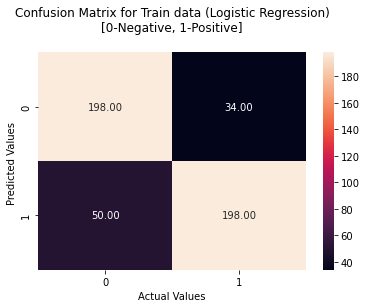

<h6>Classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.798387,0.853448,0.825,0.825918,0.826835
recall,0.853448,0.798387,0.825,0.825918,0.825000
f1-score,0.825000,0.825000,0.825,0.825000,0.825000
support,232.000000,248.000000,0.825,480.000000,480.000000


<h6>X_test

0                                                               [disappoint, accessori, good, manufactur]
1      [one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]
2                                                [particular, model, would, work, motorola, q, smartphon]
3                             [two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]
4                                                      [also, area, unit, broke, im, fond, magnet, strap]
                                                      ...                                                
594                                                                              [everyth, fresh, delici]
595                                                                                                [name]
596                                                                               [pretti, awesom, place]
597                                           

<h6>y_test

0      0
1      0
2      0
3      0
4      0
      ..
594    1
595    1
596    1
597    1
598    1
Name: Sentiment, Length: 599, dtype: int64

<h2>Using the test data on the model


<h2>Performance metrics for the test data


<h6>Accuracy

0.7846410684474123

<h6>Precision

0.7979094076655052

<h6>Recall

0.7633333333333333

<h6>f1 score

0.7802385008517887

<h6>Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Train data (Logistic Regression)\n[0-Negative, 1-Positive]\n')

Text(0.5, 15.0, 'Actual Values')

Text(33.0, 0.5, 'Predicted Values ')

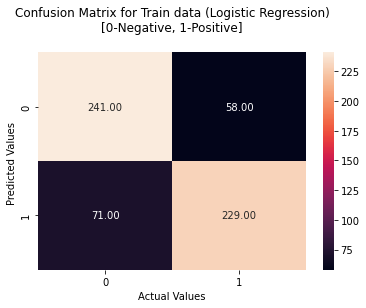

<h6>Classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.772436,0.797909,0.784641,0.785173,0.785194
recall,0.806020,0.763333,0.784641,0.784677,0.784641
f1-score,0.788871,0.780239,0.784641,0.784555,0.784547
support,299.000000,300.000000,0.784641,599.000000,599.000000


<h2>Comparing the predicted sentiment with actual sentiment (Logistic Regression)


,site,review,Sentiment,predicted_sentimet
0,amazon,"[disappoint, accessori, good, manufactur]",0,0
1,amazon,"[one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]",0,0
2,amazon,"[particular, model, would, work, motorola, q, smartphon]",0,0
3,amazon,"[two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]",0,0
4,amazon,"[also, area, unit, broke, im, fond, magnet, strap]",0,0
...,...,...,...,...
594,yelp,"[everyth, fresh, delici]",1,1
595,yelp,[name],1,0
596,yelp,"[pretti, awesom, place]",1,1
597,yelp,"[staff, great, ambianc, great]",1,1


<h1>**************************************************************

<h1>NAIVE BAYES MODEL

<h2>Performing Hyperparameter tuning and cross validation (Naive Bayes)


Fitting 15 folds for each of 5 candidates, totalling 75 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 5.62341325e-03, 3.16227766e-05, 1.77827941e-07,
       1.00000000e-09])},
             scoring='accuracy', verbose=1)

****************************************

Accuracy: 0.78182794821584
\Best Hyperparameters: {'var_smoothing': 1.0}
\Grid best C: GaussianNB(var_smoothing=1.0)


0.9755080771235018

<h2>Fitting the model with best hyperparameters from GridSearchCV (Naive Bayes)


GaussianNB(var_smoothing=1.0)

<h2>Comparing the predicted sentiment with actual sentiment in train set (Naive Bayes)


,Sentiment,predicted_sentimet_train
1639,0,1
1433,1,0
972,0,0
1572,1,1
269,0,0
...,...,...
290,0,0
2260,1,1
2045,1,1
590,1,1


,Sentiment,predicted_sentimet_train
269,0,0
1901,0,0
877,0,0
400,1,1
2255,1,1
1048,0,0
176,0,0
1054,0,1
1184,0,1
2028,1,1


,site,review,Sentiment
269,amazon,"[dont, wast, money]",0


,site,review,Sentiment
1901,yelp,"[servic, suck]",0


,site,review,Sentiment
877,imdb,"[foreign, worth, one, second, time, ]",0


,site,review,Sentiment
400,amazon,"[excit, get, headset, thought, realli, cute]",1


,site,review,Sentiment
2255,yelp,"[atmospher, fun]",1


,site,review,Sentiment
1048,imdb,"[artless, camerawork, endlessli, present, u, ugliest, set, imagin, ie, ]",0


,site,review,Sentiment
176,amazon,"[piec, crap]",0


,site,review,Sentiment
1054,imdb,"[wouldnt, see, movi, free, ]",0


,site,review,Sentiment
1184,imdb,"[quit, honestli, often, good, ]",0


,site,review,Sentiment
2028,yelp,"[great, atmospher, friendli, fast, servic]",1


,site,review,Sentiment
454,amazon,"[end, slide, edg, pant, back, pocket, instead]",1


<h2>Performance metrics for the train data (Naive Bayes)


<h6>Accuracy

0.825

<h6>precision

0.8082706766917294

<h6>recall

0.8669354838709677

<h6>f1-score

0.8365758754863813

<h6>confusion matrix

Text(0.5, 1.0, 'Confusion Matrix for Train data (Naive Bayes)\n[0-Negative, 1-Positive]\n')

Text(0.5, 15.0, 'Actual Values')

Text(33.0, 0.5, 'Predicted Values ')

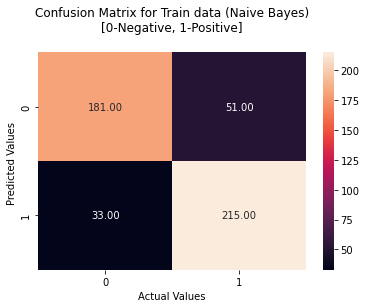

<h6>classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.845794,0.808271,0.825,0.827033,0.826407
recall,0.780172,0.866935,0.825,0.823554,0.825000
f1-score,0.811659,0.836576,0.825,0.824118,0.824533
support,232.000000,248.000000,0.825,480.000000,480.000000


0                                                               [disappoint, accessori, good, manufactur]
1      [one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]
2                                                [particular, model, would, work, motorola, q, smartphon]
3                             [two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]
4                                                      [also, area, unit, broke, im, fond, magnet, strap]
                                                      ...                                                
594                                                                              [everyth, fresh, delici]
595                                                                                                [name]
596                                                                               [pretti, awesom, place]
597                                           

0      0
1      0
2      0
3      0
4      0
      ..
594    1
595    1
596    1
597    1
598    1
Name: Sentiment, Length: 599, dtype: int64

<h2>Using the test data on the model (Naive Bayes)


<h2>Performance metrics for the test data (Naive Bayes)


<h6>Accuracy

0.7846410684474123

<h6>Precision

0.7979094076655052

<h6>Recall

0.7633333333333333

<h6>f1 score

0.7802385008517887

<h6>Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for test data (Naive Bayes)\n[0-Negative, 1-Positive]\n')

Text(0.5, 15.0, 'Actual Values')

Text(33.0, 0.5, 'Predicted Values ')

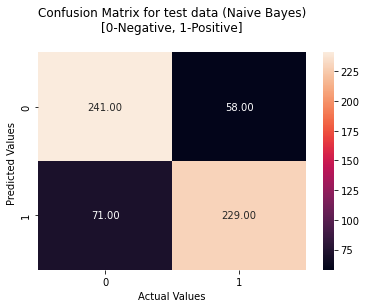

<h6>Classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.772436,0.797909,0.784641,0.785173,0.785194
recall,0.806020,0.763333,0.784641,0.784677,0.784641
f1-score,0.788871,0.780239,0.784641,0.784555,0.784547
support,299.000000,300.000000,0.784641,599.000000,599.000000


<h2>Comparing the predicted sentiment with actual sentiment (Test data, Naive Bayes)


,site,review,Sentiment,predicted_sentimet
0,amazon,"[disappoint, accessori, good, manufactur]",0,0
1,amazon,"[one, big, drawback, mp, player, button, phone, front, cover, let, paus, skip, song, lock, second]",0,0
2,amazon,"[particular, model, would, work, motorola, q, smartphon]",0,0
3,amazon,"[two, seper, mere, ft, start, notic, excess, static, garbl, sound, headset]",0,0
4,amazon,"[also, area, unit, broke, im, fond, magnet, strap]",0,0
...,...,...,...,...
594,yelp,"[everyth, fresh, delici]",1,1
595,yelp,[name],1,0
596,yelp,"[pretti, awesom, place]",1,1
597,yelp,"[staff, great, ambianc, great]",1,1


In [3]:
#df['review']=df
dftf=pd.concat([df,cv_dataframe],axis=1)


del dftf['review']


dftf_split=dftf.copy(deep=True)
y = dftf['Sentiment'].values

print(np.unique(y))



dftf.drop(['Sentiment','site'],axis=1, inplace=True)
print("dftf")
#dftf
X=dftf.values
print(X.shape,y.shape)
printmd("<h2>X\n")

X
printmd("<h2>y\n")
y

#Training and splitting the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(transformed_documents_df, df['Sentiment'],test_size=0.2,random_state=109)
printmd("<h2>Data is split\n")
# print("X-TRAIN\n")
# print(X_train)
# print("\n")
# print("X-VAL\n")
# print(X_val)
# print("\n")
# print("Y-TRAIN\n")
# print(y_train)
# print("\n")
# print("y-val\n")
# print(y_val)
# print("\n")
printmd("<h2>Data shape after split\n")
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

printmd("<h1>LOGISTIC REGRESSION MODEL")

cv = RepeatedKFold(n_splits=5, n_repeats=3)
grid = { 
    'C': [0.1,0.5,1,10],
    'solver':['newton-cg', 'lbfgs', 'liblinear'],


       }

logreg = LogisticRegression()
grid=GridSearchCV(estimator=LogisticRegression(), param_grid=grid, scoring='accuracy',cv=cv, verbose = 1)
printmd("<h2>Performing Hyperparameter tuning and cross validation\n")

grid.fit(X_train,y_train)
print("****************************************")
print("\nAccuracy:",grid.best_score_)
print("\Best Hyperparameters:",grid.best_params_)
print("\Grid best C:",grid.best_estimator_)
log_param=grid.best_params_
loggrid=grid.best_estimator_
loggrid.score(X_train,y_train)


printmd("<h2>Fitting the model with best hyperparameters from GridSearchCV\n")

logreg1 = loggrid
logreg1.fit(X_train,y_train)
logreg1_predict=logreg1.predict(X_val)
printmd("<h2>Comparing the predicted sentiment with actual sentiment in train set (Logistic Regression)\n")
df_train_comparison=pd.concat([y_val ],axis=1)
df_train_comparison['predicted_sentimet_train']=logreg1_predict
df_train_comparison
printmd("<h2>Comparing few of the data rows\n")
df_train_comparison[4:15]

df[269:270]
df[1901:1902]
df[877:878]
df[400:401]
df[2255:2256]
df[1048:1049]
df[176:177]
df[1054:1055]
df[1184:1185]
df[2028:2029]
df[454:455]


printmd("<h2>Performance metrics for the train data\n")
printmd("<h6>Accuracy")
accuracy_score(y_val,logreg1_predict)
printmd("<h6>Precision")
precision_score(y_val,logreg1_predict)
printmd("<h6>Recall")
recall_score(y_val,logreg1_predict)
printmd("<h6>f1 score")
f1_score(y_val,logreg1_predict)
printmd("<h6>confusion matrix")


cm_train1 = confusion_matrix(y_val,logreg1_predict)
c1=sn.heatmap(cm_train1, annot=True, fmt = '.2f')
plt.title('Confusion Matrix for Train data (Logistic Regression)\n[0-Negative, 1-Positive]\n')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.show()

printmd("<h6>Classification report")
cr=pd.DataFrame(classification_report(y_val,logreg1_predict, output_dict=True))
cr

X_test=dft['review']
y_test=dft['Sentiment']
printmd("<h6>X_test")
X_test
printmd("<h6>y_test")
y_test

X_test_data=dft['review']
test_col = [' '.join(words) for words in X_test_data]

printmd("<h2>Using the test data on the model\n")

X_test_tfidf = vectorizer.transform(test_col) # X_test can be the entire column if you are loading from a separate file
result = logreg1.predict(X_test_tfidf)
score = logreg1.score(X_test_tfidf, y_test)

printmd("<h2>Performance metrics for the test data\n")
printmd("<h6>Accuracy")
accuracy_score(y_test,result)
printmd("<h6>Precision")
precision_score(y_test,result)
printmd("<h6>Recall")
recall_score(y_test,result)
printmd("<h6>f1 score")
f1_score(y_test,result)
printmd("<h6>Confusion Matrix")

cm_test1 = confusion_matrix(y_test,result)
c2=sn.heatmap(cm_test1, annot=True, fmt = '.2f')
plt.title('Confusion Matrix for Train data (Logistic Regression)\n[0-Negative, 1-Positive]\n')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.show()


printmd("<h6>Classification report")
crtest=pd.DataFrame(classification_report(y_test,result, output_dict=True))
crtest

printmd("<h2>Comparing the predicted sentiment with actual sentiment (Logistic Regression)\n")
dft_final=dft
dft_final['predicted_sentimet']=result
dft_final



printmd("<h1>**************************************************************")

printmd("<h1>NAIVE BAYES MODEL")
cv = RepeatedKFold(n_splits=5, n_repeats=3)
gridnb = { 
    'var_smoothing': np.logspace(0,-9, num=5)
       }

nb_classifier = GaussianNB()
grid2=GridSearchCV(estimator=GaussianNB(), param_grid=gridnb, scoring='accuracy',cv=cv, verbose = 1)
printmd("<h2>Performing Hyperparameter tuning and cross validation (Naive Bayes)\n")

grid2.fit(X_train,y_train)
print("****************************************")
print("\nAccuracy:",grid2.best_score_)
print("\Best Hyperparameters:",grid2.best_params_)
print("\Grid best C:",grid2.best_estimator_)
nbid=grid2.best_estimator_
nbid.score(X_train,y_train)

printmd("<h2>Fitting the model with best hyperparameters from GridSearchCV (Naive Bayes)\n")
nb_param=grid2.best_params_
nb1 = nbid
nb1.fit(X_train,y_train)
nb1_predict=nb1.predict(X_val)
printmd("<h2>Comparing the predicted sentiment with actual sentiment in train set (Naive Bayes)\n")
df_train_comparison_nb=pd.concat([y_val ],axis=1)
df_train_comparison_nb['predicted_sentimet_train']=nb1_predict
df_train_comparison_nb

df_train_comparison_nb[4:15]

df[269:270]
df[1901:1902]
df[877:878]
df[400:401]
df[2255:2256]
df[1048:1049]
df[176:177]
df[1054:1055]
df[1184:1185]
df[2028:2029]
df[454:455]


printmd("<h2>Performance metrics for the train data (Naive Bayes)\n")
printmd("<h6>Accuracy")
accuracy_score(y_val,nb1_predict)
printmd("<h6>precision")
precision_score(y_val,nb1_predict)
printmd("<h6>recall")
recall_score(y_val,nb1_predict)
printmd("<h6>f1-score")
f1_score(y_val,nb1_predict)
printmd("<h6>confusion matrix")

cm_train2 = confusion_matrix(y_val,nb1_predict)
c3=sn.heatmap(cm_train2, annot=True, fmt = '.2f')
plt.title('Confusion Matrix for Train data (Naive Bayes)\n[0-Negative, 1-Positive]\n')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.show()
printmd("<h6>classification report")
cr=pd.DataFrame(classification_report(y_val,nb1_predict, output_dict=True))
cr

Xnb_test=dft['review']
ynb_test=dft['Sentiment']
Xnb_test
ynb_test

X_test_data_nb=dft['review']
test_col_nb = [' '.join(words) for words in X_test_data_nb]

printmd("<h2>Using the test data on the model (Naive Bayes)\n")

X_test_tfidf_nb = vectorizer.transform(test_col_nb) # X_test can be the entire column if you are loading from a separate file
result_nb = logreg1.predict(X_test_tfidf_nb)
score = logreg1.score(X_test_tfidf_nb, y_test)

printmd("<h2>Performance metrics for the test data (Naive Bayes)\n")
printmd("<h6>Accuracy")
accuracy_score(ynb_test,result_nb)
printmd("<h6>Precision")
precision_score(ynb_test,result_nb)
printmd("<h6>Recall")
recall_score(ynb_test,result_nb)
printmd("<h6>f1 score")
f1_score(ynb_test,result_nb)
printmd("<h6>Confusion Matrix")
cm_test2 = confusion_matrix(ynb_test,result_nb)
c4=sn.heatmap(cm_test2, annot=True, fmt = '.2f')
plt.title('Confusion Matrix for test data (Naive Bayes)\n[0-Negative, 1-Positive]\n')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values ')
plt.show()

printmd("<h6>Classification report")
crtest=pd.DataFrame(classification_report(ynb_test,result_nb, output_dict=True))
crtest

printmd("<h2>Comparing the predicted sentiment with actual sentiment (Test data, Naive Bayes)\n")
dft_final_nb=dft
dft_final_nb['predicted_sentimet']=result_nb
dft_final_nb






In [1]:
# import pandas as pd
# # from IPython.display import Markdown, display  #To use Markup language in a code cell
# # #pandas.set_option('display.max_rows', None)
# # def printmd(string): #To use Markup language in a code cell
# #     display(Markdown(string))
# # from IPython.core.interactiveshell import InteractiveShell #For displaying all the output for a sigle cell
# # InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# printmd("<h1> DATA LOADING AND DATA EXPLORATION\n")
df=pd.read_csv('customers.csv')
df
# printmd("<h3> columns\n")
list(df.columns)
df.isnull().sum()